Question 1: What is Anomaly Detection? Explain its types

Answer:
- Anomaly Detection is the process of identifying data points or patterns that deviate significantly from normal behavior. These unusual patterns may indicate fraud, faults, attacks, or rare events.
-Types of Anomalies
1. Point Anomaly
A single data point that is abnormal compared to the rest.
- Example:
A taxi fare of ₹10,000 when normal fares range between ₹100–₹500.

2. Contextual Anomaly
A data point is anomalous only in a specific context (time, location, season).
Example:
Electricity usage of 500 MW:
Normal during daytime
Anomalous at midnight
3. Collective Anomaly
A group of related data points is anomalous together, even if individual points seem normal.
Example:
Sudden continuous drop in airline passengers over several months.

Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor
Answer:
 - Isolation Forest detects anomalies by randomly isolating data points using decision trees and is best suited for large and high-dimensional datasets.
 - DBSCAN identifies anomalies as points that do not belong to any dense cluster and works well for spatial data with varying shapes and noise.
 - Local Outlier Factor (LOF) detects anomalies by comparing the local density of a data point with its neighbors and is effective for finding local outliers.

 Question 3: Key Components of Time Series

1. Trend
Long-term upward or downward movement
📌 Example: Increase in airline passengers over years
2. Seasonality
Repeating patterns at fixed intervals
📌 Example: Higher sales during festivals
3. Cyclic
Irregular fluctuations over long periods
📌 Example: Economic cycles
4. Residual (Noise)
Random variations
📌 Example: Weather disturbances

Question 4: Stationarity in Time Series
(10 Marks)
- Definition
  - A time series is stationary if:
Mean is constant
Variance is constant
Autocovariance is constant over time
Testing Stationarity
ADF Test (Augmented Dickey-Fuller)
Making a Series Stationary
Differencing
Log transformation
Seasonal differencing

Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX
Answer:
 - The AR (AutoRegressive) model predicts future values using past values of the time series.
 - The MA (Moving Average) model predicts future values using past error terms.
 - The ARIMA model combines AR and MA with differencing to handle non-stationary time series data.
 - The SARIMA model extends ARIMA by adding seasonal components, making it suitable for seasonal time series data.
 - The SARIMAX model further extends SARIMA by including external (exogenous) variables such as weather or holidays to improve forecasting accuracy.



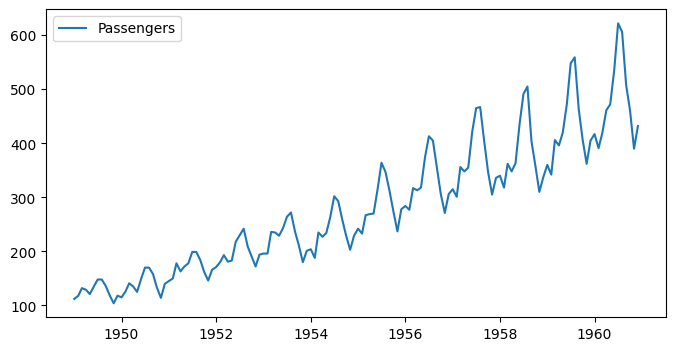

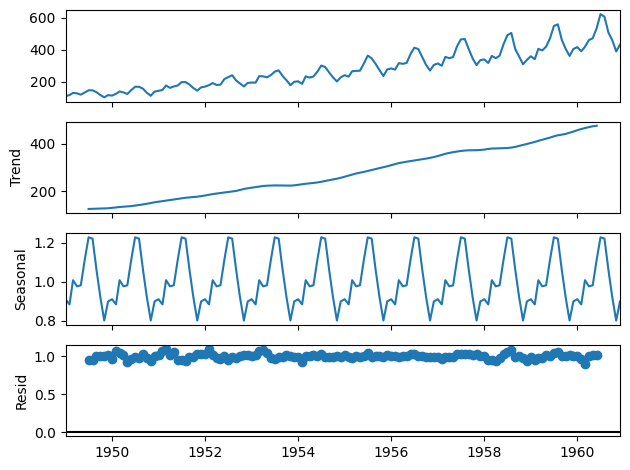

In [3]:
#Question 6: Time Series Decomposition (AirPassengers)
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_csv("/content/AirPassengers.csv")
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

plt.figure(figsize=(8,4))
plt.plot(df, label='Passengers')
plt.legend()
plt.show()

decomposition = seasonal_decompose(df, model='multiplicative')
decomposition.plot()
plt.show()


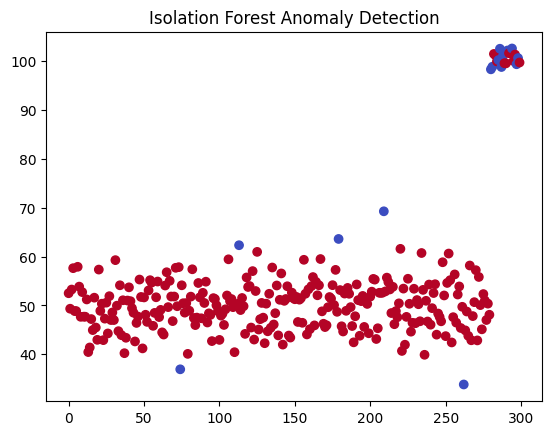

In [1]:
#Question 7: Isolation Forest for Anomaly Detection
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.random.normal(50, 5, 300).reshape(-1,1)
X[280:] = np.random.normal(100, 2, 20).reshape(-1,1)

iso = IsolationForest(contamination=0.05)
labels = iso.fit_predict(X)

plt.scatter(range(len(X)), X, c=labels, cmap='coolwarm')
plt.title("Isolation Forest Anomaly Detection")
plt.show()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


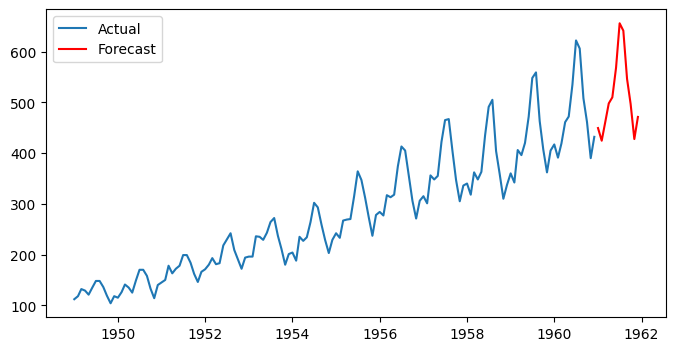

In [4]:
#Question 8: SARIMA Forecasting (AirPassengers)
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df,
                order=(1,1,1),
                seasonal_order=(1,1,1,12))
results = model.fit()

forecast = results.get_forecast(steps=12)
pred = forecast.predicted_mean

plt.figure(figsize=(8,4))
plt.plot(df, label='Actual')
plt.plot(pred, label='Forecast', color='red')
plt.legend()
plt.show()


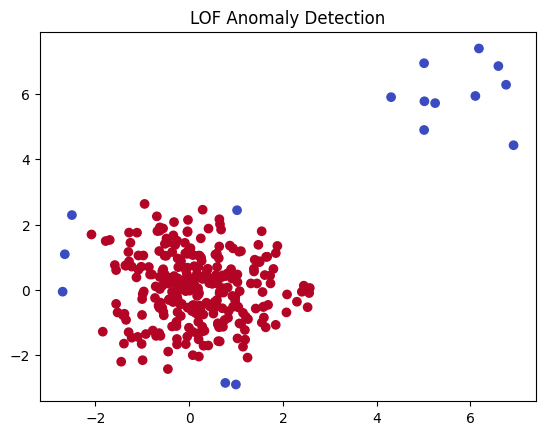

In [5]:
#Question 9: Local Outlier Factor (LOF)
from sklearn.neighbors import LocalOutlierFactor

X = np.random.normal(0, 1, (300, 2))
X[290:] += 6

lof = LocalOutlierFactor(n_neighbors=20)
labels = lof.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels, cmap='coolwarm')
plt.title("LOF Anomaly Detection")
plt.show()


Question 10: Real-Time Energy Monitoring Workflow

 - Anomaly Detection
Isolation Forest → scalable, real-time
LOF → region-wise local anomalies
- Forecasting Model
  - SARIMAX
  - Handles seasonality
  - Uses weather as exogenous variables
- Validation & Monitoring
  - Rolling window evaluation
  - Drift detection
  -  Model retraining schedule
- Business Impact
  - Prevent power outages
  - Optimize load distribution
  - Reduce operational cost
  - Improve customer reliability